<a href="https://colab.research.google.com/github/tilopez/GO_distance/blob/master/5_definir_nociones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Toolboxes y funciones

In [0]:
!pip install pygsp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pygsp import graphs, filters, plotting
np.set_printoptions(suppress=True)

     |████████████████████████████████| 1.8MB 3.1MB/s 


In [0]:
def exp_matrix( dist, exp ):
  dist = dist.round(8)
  rta = np.zeros(exp.shape)
  [n,m] = exp.shape

  for i in range(n):
    fila_dist = np.concatenate((dist[i,0:i],dist[i,i+1:n]))
    comps = np.zeros(m)
    cont = 0
    for j in range(n-2):
      for k in range(j+1,n-1):
        comps[cont] = 0 if fila_dist[j] < fila_dist[k] else 1 if fila_dist[j] == fila_dist[k] else 2
        cont = cont + 1
    rta[i,:] = comps

  eva = []
  genes = []
  cant = 0

  for i in range(n):
    word = []
    for j in range(m):
      if rta[i,j] == exp[i,j]:
        word.append("right")
      else:      
        word.append("WRONG")
        cant += 1
        
        # determinar los genes que dieron el error
        cont = 0
        for k in range(n-1):
          for l in range(k,n):
            if k != i and l != i and k != l:
              if cont == j:
                genes.append([i+1, k+1, l+1])
              cont += 1

    eva.append(word)

  print("Nro de errores: ", cant)

  return(eva,genes)

In [0]:
def labgene(labs,N):
  g = np.zeros(N)
  for i in labs:
    g[i] = 1
  return g

In [0]:
# para graficar los genes que se van a comparar
def plot_comparacion( id_genes ):
  
  for i in range(len(id_genes)):
    id_genes[i] = id_genes[i] - 1

  fig, ax = plt.subplots(1, 3, figsize=(20,4))
  for i in range(3):
    ax1 = plt.subplot(1, 3, i+1);
    G.plot_signal(genes[id_genes[i]], ax=ax1, plot_name=noms[id_genes[i]])

# Grafo y genes

In [0]:
ini = np.array([0, 1, 1, 2, 3, 4, 4, 5, 5, 6, 7,  9,  10])
fin = np.array([1, 2, 3, 4, 5, 6, 7, 7, 8, 9, 10, 11, 12])

N = fin.max()+1
A = np.zeros((N,N))

for i, f in zip(ini, fin):
    A[i,f] = 1
A = A + A.T

print(A)

# Matriz de grado
d = np.sum(A,1)
D = np.diag(d)

# Laplaciano
L = D - A

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


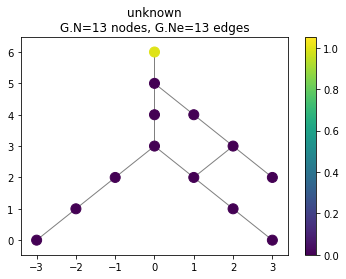

In [0]:
G = graphs.Graph(A)

coords = [[0, 6], [0, 5], [0, 4], [1, 4], [0, 3], [2, 3], [-1, 2], [1, 2], [3, 2], [-2, 1], [2, 1], [-3, 0], [3, 0]]
G.set_coordinates(coords)

G.plot_signal(np.concatenate(([1],[0]*12)))

[1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0.]
[1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.]


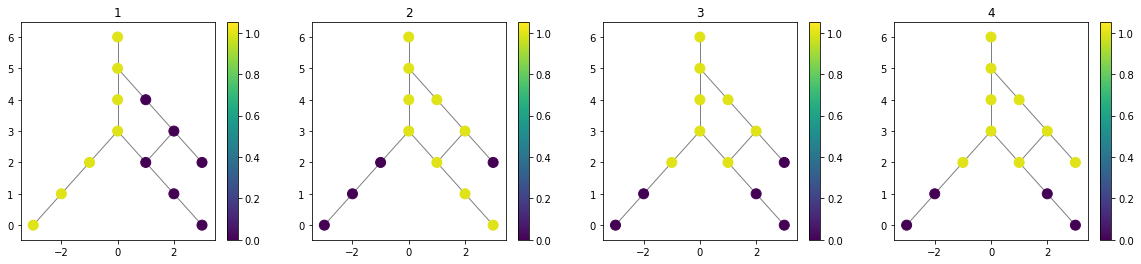

In [0]:
genes = []
genes.append(labgene([0,1,2,4,6,9,11],N))
genes.append(labgene([0,1,2,3,4,5,7,10,12],N))
genes.append(labgene([0,1,2,3,4,5,6,7],N))
genes.append(labgene([0,1,2,3,4,5,6,7,8],N))

for i in genes:
  print(i)

n = len(genes)
strgen = "gen "

plotting.BACKEND = 'matplotlib'
fig, ax = plt.subplots(1, n, figsize=(20,4))

for i in range(n):
    ax1 = plt.subplot(1, n, i+1)
    G.plot_signal(genes[i], ax=ax1, plot_name=strgen.join(str(i+1)))

# Bases

## Base propia de todos los caminos por hoja

[[1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
 [1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0.]
 [1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1.]]


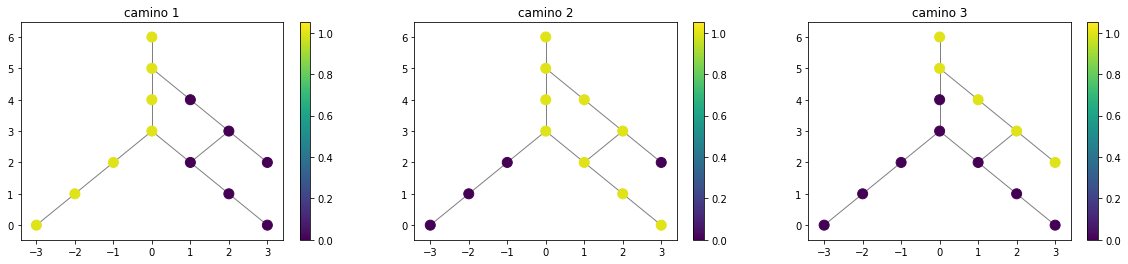

In [0]:
b1_camino1 = labgene([0,1,2,4,6,9,11],N)
b1_camino2 = labgene([0,1,2,3,4,5,7,10,12],N)
b1_camino3 = labgene([0,1,3,5,8],N)

plotting.BACKEND = 'matplotlib'
fig, ax = plt.subplots(1, 3, figsize=(20,4))

ax1 = plt.subplot(1, 3, 1);     G.plot_signal(b1_camino1, ax=ax1, plot_name="camino 1")
ax1 = plt.subplot(1, 3, 2);     G.plot_signal(b1_camino2, ax=ax1, plot_name="camino 2")
ax1 = plt.subplot(1, 3, 3);     G.plot_signal(b1_camino3, ax=ax1, plot_name="camino 3")

B1 = np.column_stack((b1_camino1, b1_camino2, b1_camino3)).T

d1=np.sum(B1.T,axis=0)
idx1=np.argsort(d1)
B1=B1[idx1,:]
print(B1)

## Base propia de todos los caminos posibles

[[1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
 [1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0.]
 [1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1.]
 [1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1.]]


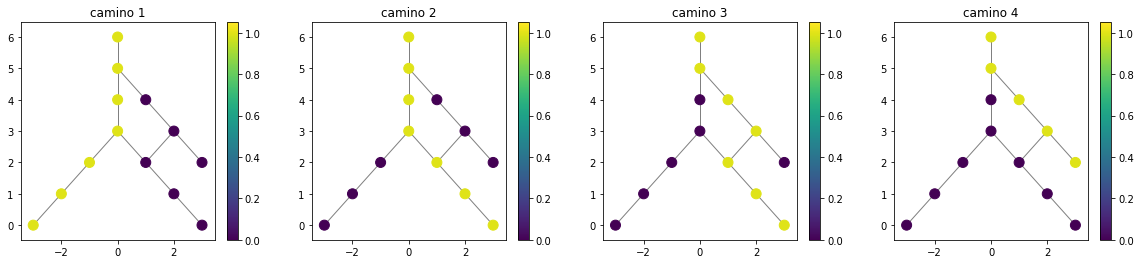

In [0]:
b2_camino1 = labgene([0,1,2,4,6,9,11],N)
b2_camino2 = labgene([0,1,2,4,7,10,12],N)
b2_camino3 = labgene([0,1,3,5,7,10,12],N)
b2_camino4 = labgene([0,1,3,5,8],N)

plotting.BACKEND = 'matplotlib'
fig, ax = plt.subplots(1, 4, figsize=(20,4))

ax1 = plt.subplot(1, 4, 1);     G.plot_signal(b2_camino1, ax=ax1, plot_name="camino 1")
ax1 = plt.subplot(1, 4, 2);     G.plot_signal(b2_camino2, ax=ax1, plot_name="camino 2")
ax1 = plt.subplot(1, 4, 3);     G.plot_signal(b2_camino3, ax=ax1, plot_name="camino 3")
ax1 = plt.subplot(1, 4, 4);     G.plot_signal(b2_camino4, ax=ax1, plot_name="camino 4")

B2 = np.column_stack((b2_camino1, b2_camino2, b2_camino3, b2_camino4)).T

d2=np.sum(B2.T,axis=0)
idx2=np.argsort(d2)
B2=B2[idx2,:]
print(B2)

## Base del Laplaciano

In [0]:
autoval, autovec = np.linalg.eigh(L)
idx = autoval.argsort();
autoval = autoval[idx]
B3 = autovec[:,idx]

# Calcular distancias

In [0]:
dist_B1 = np.zeros((n,n))
dist_B2 = np.zeros((n,n))
dist_B3 = np.zeros((n,n))
genes = np.column_stack(genes).T

ggf1 = np.dot(B1, genes.T).T
for i in range(n):
  for j in range(i,n):
    dist_B1[i,j] = np.linalg.norm(ggf1[i,:]-ggf1[j,:])
dist_B1 = dist_B1 + dist_B1.T

ggf2 = np.dot(B2, genes.T).T
for i in range(n):
  for j in range(i,n):
    dist_B2[i,j] = np.linalg.norm(ggf2[i,:]-ggf2[j,:])
dist_B2 = dist_B2 + dist_B2.T

# el laplaciano va transpuesto
ggf3 = np.dot(B3[:,-4:].T, genes.T).T
for i in range(n):
  for j in range(i,n):
    dist_B3[i,j] = np.linalg.norm(ggf3[i,:]-ggf3[j,:])
dist_B3 = dist_B3 + dist_B3.T

noms = []
for i in range(n):
  noms.append(strgen.join(str(i+1)))

print("\n Caminos unidos")
frame1 = pd.DataFrame(dist_B1, noms, noms)
print(frame1) 

print("\n Caminos separados")
frame2 = pd.DataFrame(dist_B2, noms, noms)
print(frame2)

print("\n Laplaciano")
frame3 = pd.DataFrame(dist_B3, noms, noms)
print(frame3) 


 Caminos unidos
          1         2         3         4
1  0.000000  6.164414  4.123106  4.690416
2  6.164414  0.000000  2.236068  2.449490
3  4.123106  2.236068  0.000000  1.000000
4  4.690416  2.449490  1.000000  0.000000

 Caminos separados
          1         2         3         4
1  0.000000  6.855655  4.242641  4.795832
2  6.855655  0.000000  3.000000  3.162278
3  4.242641  3.000000  0.000000  1.000000
4  4.795832  3.162278  1.000000  0.000000

 Laplaciano
          1         2         3         4
1  0.000000  5.656854  4.472136  4.898979
2  5.656854  0.000000  3.464102  4.000000
3  4.472136  3.464102  0.000000  2.000000
4  4.898979  4.000000  2.000000  0.000000


# Completar la matriz con los datos esperados

In [0]:
# matriz de datos esperados
n = 4
m = 0
for i in range(2,n):
  m = m + n - i
exp = np.zeros((n,m))

In [0]:
exp[0,0]=2 # 1,2,3        por la cantidad de nodos en común, el 1 con el 3 tienen un nodo en comun mas que el 1 con el 2
exp[0,1]=2 # 1,2,4        por la cantidad de nodos en común, el 1 con el 4 tienen 1 etiqueta positiva a favor y 2 etiqueta negativa a favor, y el 1 con el 2 tiene 1 negativa en contra
exp[0,2]=0 # 1,3,4        por la cantidad de nodos de diferencia, porque el 4 tiene mas nodos positivos en la rama en la que no tendria que tener nada
plot_comparacion([1,2,3])
plot_comparacion([1,2,4])
plot_comparacion([1,3,4])

In [0]:
exp[1,0]=2 # 2,1,3        por la cantidad de nodos en común,el 1 tiene nodos en una rama totalmente diferente
exp[1,1]=2 # 2,1,4        por la cantidad de nodos en común,el 1 tiene nodos en una rama totalmente diferente
exp[1,2]=0 # 2,3,4        por la cantidad de nodos de diferencia, tanto el 3 como el 4 tienen dos etiqutas faltantes en una rama, una etiqueta sobrante en una rama y ademas el 4 tiene una sobrante en la rama máás a la derecha
plot_comparacion([2,1,3])
plot_comparacion([2,1,4])
plot_comparacion([2,3,4])

In [0]:
exp[2,0]=2 # 3,1,2        por la cantidad de nodos en común, el 3 es muy parecido al 2 salvo por tres etiquetas
exp[2,1]=2 # 3,1,4        por la cantidad de nodos en común, el 3 es muy parecido al 4, igual al caso anterior
exp[2,2]=2 # 3,2,4        por la cantidad de nodos en común, el 2 tiene dos etiquetas de mas y le falta una etiqueta, el 4 tiene una etiqueta de mas
plot_comparacion([3,1,2])
plot_comparacion([3,1,4])
plot_comparacion([3,2,4])

In [0]:
exp[3,0]=2 # 4,1,2        por la cantidad de nodos en común, el 4 es mucho máás parecido al 2
exp[3,1]=2 # 4,1,3        por la cantidad de nodos en común, el 4 es mucho máás parecido al 3
exp[3,2]=2 # 4,2,3        por la cantidad de nodos en común, porque conra ambos tiene un error al mismo nivel, pero el 2 agrega 2 errores mas a mayor especificidad, o sea, a mayor informacion
plot_comparacion([4,1,2])
plot_comparacion([4,1,3])
plot_comparacion([4,2,3])

In [0]:
print(exp)

# Comparar resultados

In [0]:
print('Resultados de la base de caminos unidos')
[comp_B1,lista_genes1]=exp_matrix(dist_B1,exp)
for i in comp_B1:
  print(i)

print(' ')
print('Resultados de la base de todos los caminos')
[comp_B2,lista_genes2]=exp_matrix(dist_B2,exp)
for i in comp_B2:
  print(i)

print(' ')
print('Resultados de la base del laplaciano')
[comp_B3,lista_genes3]=exp_matrix(dist_B3,exp)
for i in comp_B3:
  print(i)

print(" ")
print("Lista de genes donde la comparacion dio error")
print(" ")
print("Base 1")
for i in lista_genes1:
  print(i)
print(" ")
print("Base 2")
for i in lista_genes2:
  print(i)
print(" ")
print("Base 3")
for i in lista_genes3:
  print(i)

Resultados de la base de caminos unidos
Nro de errores:  0
['right', 'right', 'right']
['right', 'right', 'right']
['right', 'right', 'right']
['right', 'right', 'right']
 
Resultados de la base de todos los caminos
Nro de errores:  0
['right', 'right', 'right']
['right', 'right', 'right']
['right', 'right', 'right']
['right', 'right', 'right']
 
Resultados de la base del laplaciano
Nro de errores:  0
['right', 'right', 'right']
['right', 'right', 'right']
['right', 'right', 'right']
['right', 'right', 'right']
 
Lista de genes donde la comparacion dio error
 
Base 1
 
Base 2
 
Base 3
